# Qa of Tractography Tutorial

This tutorial provides a basic overview of how to run QA of Tractography manually within Python. 
We begin by checking for dependencies, then we set our input parameters and output file path, then we smiply run.

# Dependencies

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

from fury import actor, window, colormap, ui
from dipy.tracking.streamline import Streamlines
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap

# Set our input/output path

In [2]:
#Change the stream_path manually, the stream_path is the path for the input streamline.trk file.
stream_path = '/Users/zhenhu/Desktop/qa_fiber/streamlines.trk'
#Change the qa_out_path manually, the qa_out_path is the path for the output QA imgae file.
qa_out_path = '/Users/zhenhu/Desktop/vertical'
#Change the brain_path manually, the brain_path is the path for the reference brain scan, in order to get the scan volume..
brain_path = '/Users/zhenhu/Documents/NDD/Downloads/ndmg_outputs2/sub-0025864/ses-1/dwi/preproc/eddy_corrected_data_reor_RAS_res.nii.gz'

# The Code

In [3]:
def combine_plot(qa_out_path,brain_path):
    """
    Combine the nine plots produced by qa_tractography function into one image.

    Parameters
    ----------
    qa_out_path : str
        Path for the output QA imgae file(s)
    brain_path : str
        Path for the reference brain scan, in order to get the scan volume.
    """
    
    brain_ref = nib.load(brain_path)
    brain_ref_shape = brain_ref.shape[0:3]

#   plt.rcParams.update({"axes.labelsize":"x-large","axes.titlesize":"x-large"})
    plots_list = ['imgage1000000.png','imgage1000001.png','imgage1000002.png',
                 'imgage2000000.png','imgage2000001.png','imgage2000002.png',
                 'imgage3000000.png','imgage3000001.png','imgage3000002.png']
    y_labels = ["Rotate with Z axis","Rotate with Y axis","Rotate with X axis"]
    x_labels = ["angle=0","angle=120","angle=240"]
    
    #Temporary list to store the open image:
    im=[] 
    #Temporary list to store the image nparray:
    im_arr=[] 

    fig= plt.figure()
    plt.title(f'QA_tractography. Scan volume = {brain_ref_shape} \n\n', fontsize=60,fontweight='bold')
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")

    j = 0
    for i in range(9):
        im.append(Image.open(qa_out_path + "/"+ plots_list[i]))
        im_arr.append(np.array(im[i])) 
        #Change the background of the image into black:
        im_arr[i] = np.where(im_arr[i]<=0.01, 255, im_arr[i]) 
        ax = fig.add_subplot(3,3,i+1)
        ax.imshow(im_arr[i],interpolation="none",alpha=0.9)
        if i<3:
            ax.set_title(x_labels[i],fontsize=60,fontweight='bold')
        if i % 3 == 0:
            ax.set_ylabel(y_labels[j],fontsize=60,fontweight='bold')
            j = j + 1
        plt.xticks([])
        plt.yticks([])
            
        im[i].close()
    fig.set_size_inches(40, 40, forward = True)
    fig.savefig(qa_out_path + "/" + 'qa_tractography.png', format='png')

    for plot in plots_list:
        os.chdir(qa_out_path)
        #print(os.getcwd())
        if os.path.exists(qa_out_path + "/" + plot):
            os.remove(plot)
        else:
            print('No such file generated from streamlines window.')

def qa_tractography(stream_path,qa_out_path,brain_path):
    """
    Visualize the streamlines, 
    then using window.record to get nine snapshots of the 3D streamslines.

    Parameters
    ----------
    stream_path : str
        Path for the input streamline.trk file(s).
    qa_out_path_path : str
        Path for the output QA imgae file(s)
    brain_path : str
        Path for the reference brain scan, in order to get the scan volume.
    """
    
    streamlines_mni = str(stream_path)
    r = window.renderer()

    streamlines_mni_load = nib.streamlines.load(streamlines_mni).streamlines
    streamlines_mni_in = Streamlines(streamlines_mni_load)
    streamlines_actor = actor.line(
        streamlines_mni_in,
        colormap.line_colors(streamlines_mni_in),
        lod_points=10000,
        depth_cue=True,
        linewidth=0.2,
        fake_tube=True,
        opacity=0.3,
    )
    
    r.add(streamlines_actor)
    
    interactive = False
    if interactive:
        window.show(r)
        
    showmng = window.ShowManager(r)
    window.record(r,cam_pos = (70.03, 64.97, 269.80), cam_view = (0,1,0),path_numbering= True,out_path = qa_out_path + '/imgage1', az_ang=120,n_frames=3,reset_camera=True,size=(600,600))
    window.record(r,cam_pos = (70.03, 64.97, 269.80), cam_view = (1,0,0),path_numbering= True,out_path = qa_out_path + '/imgage2', az_ang=120,n_frames=3,reset_camera=True,size=(600,600))
    window.record(r,cam_pos = (70.03, 64.97, 269.80), cam_view = (0,0,1),path_numbering= True,out_path = qa_out_path + '/imgage3', az_ang=120,n_frames=3,reset_camera=True,size=(600,600))
    showmng.exit()
    combine_plot(qa_out_path,brain_path)

# Run the code

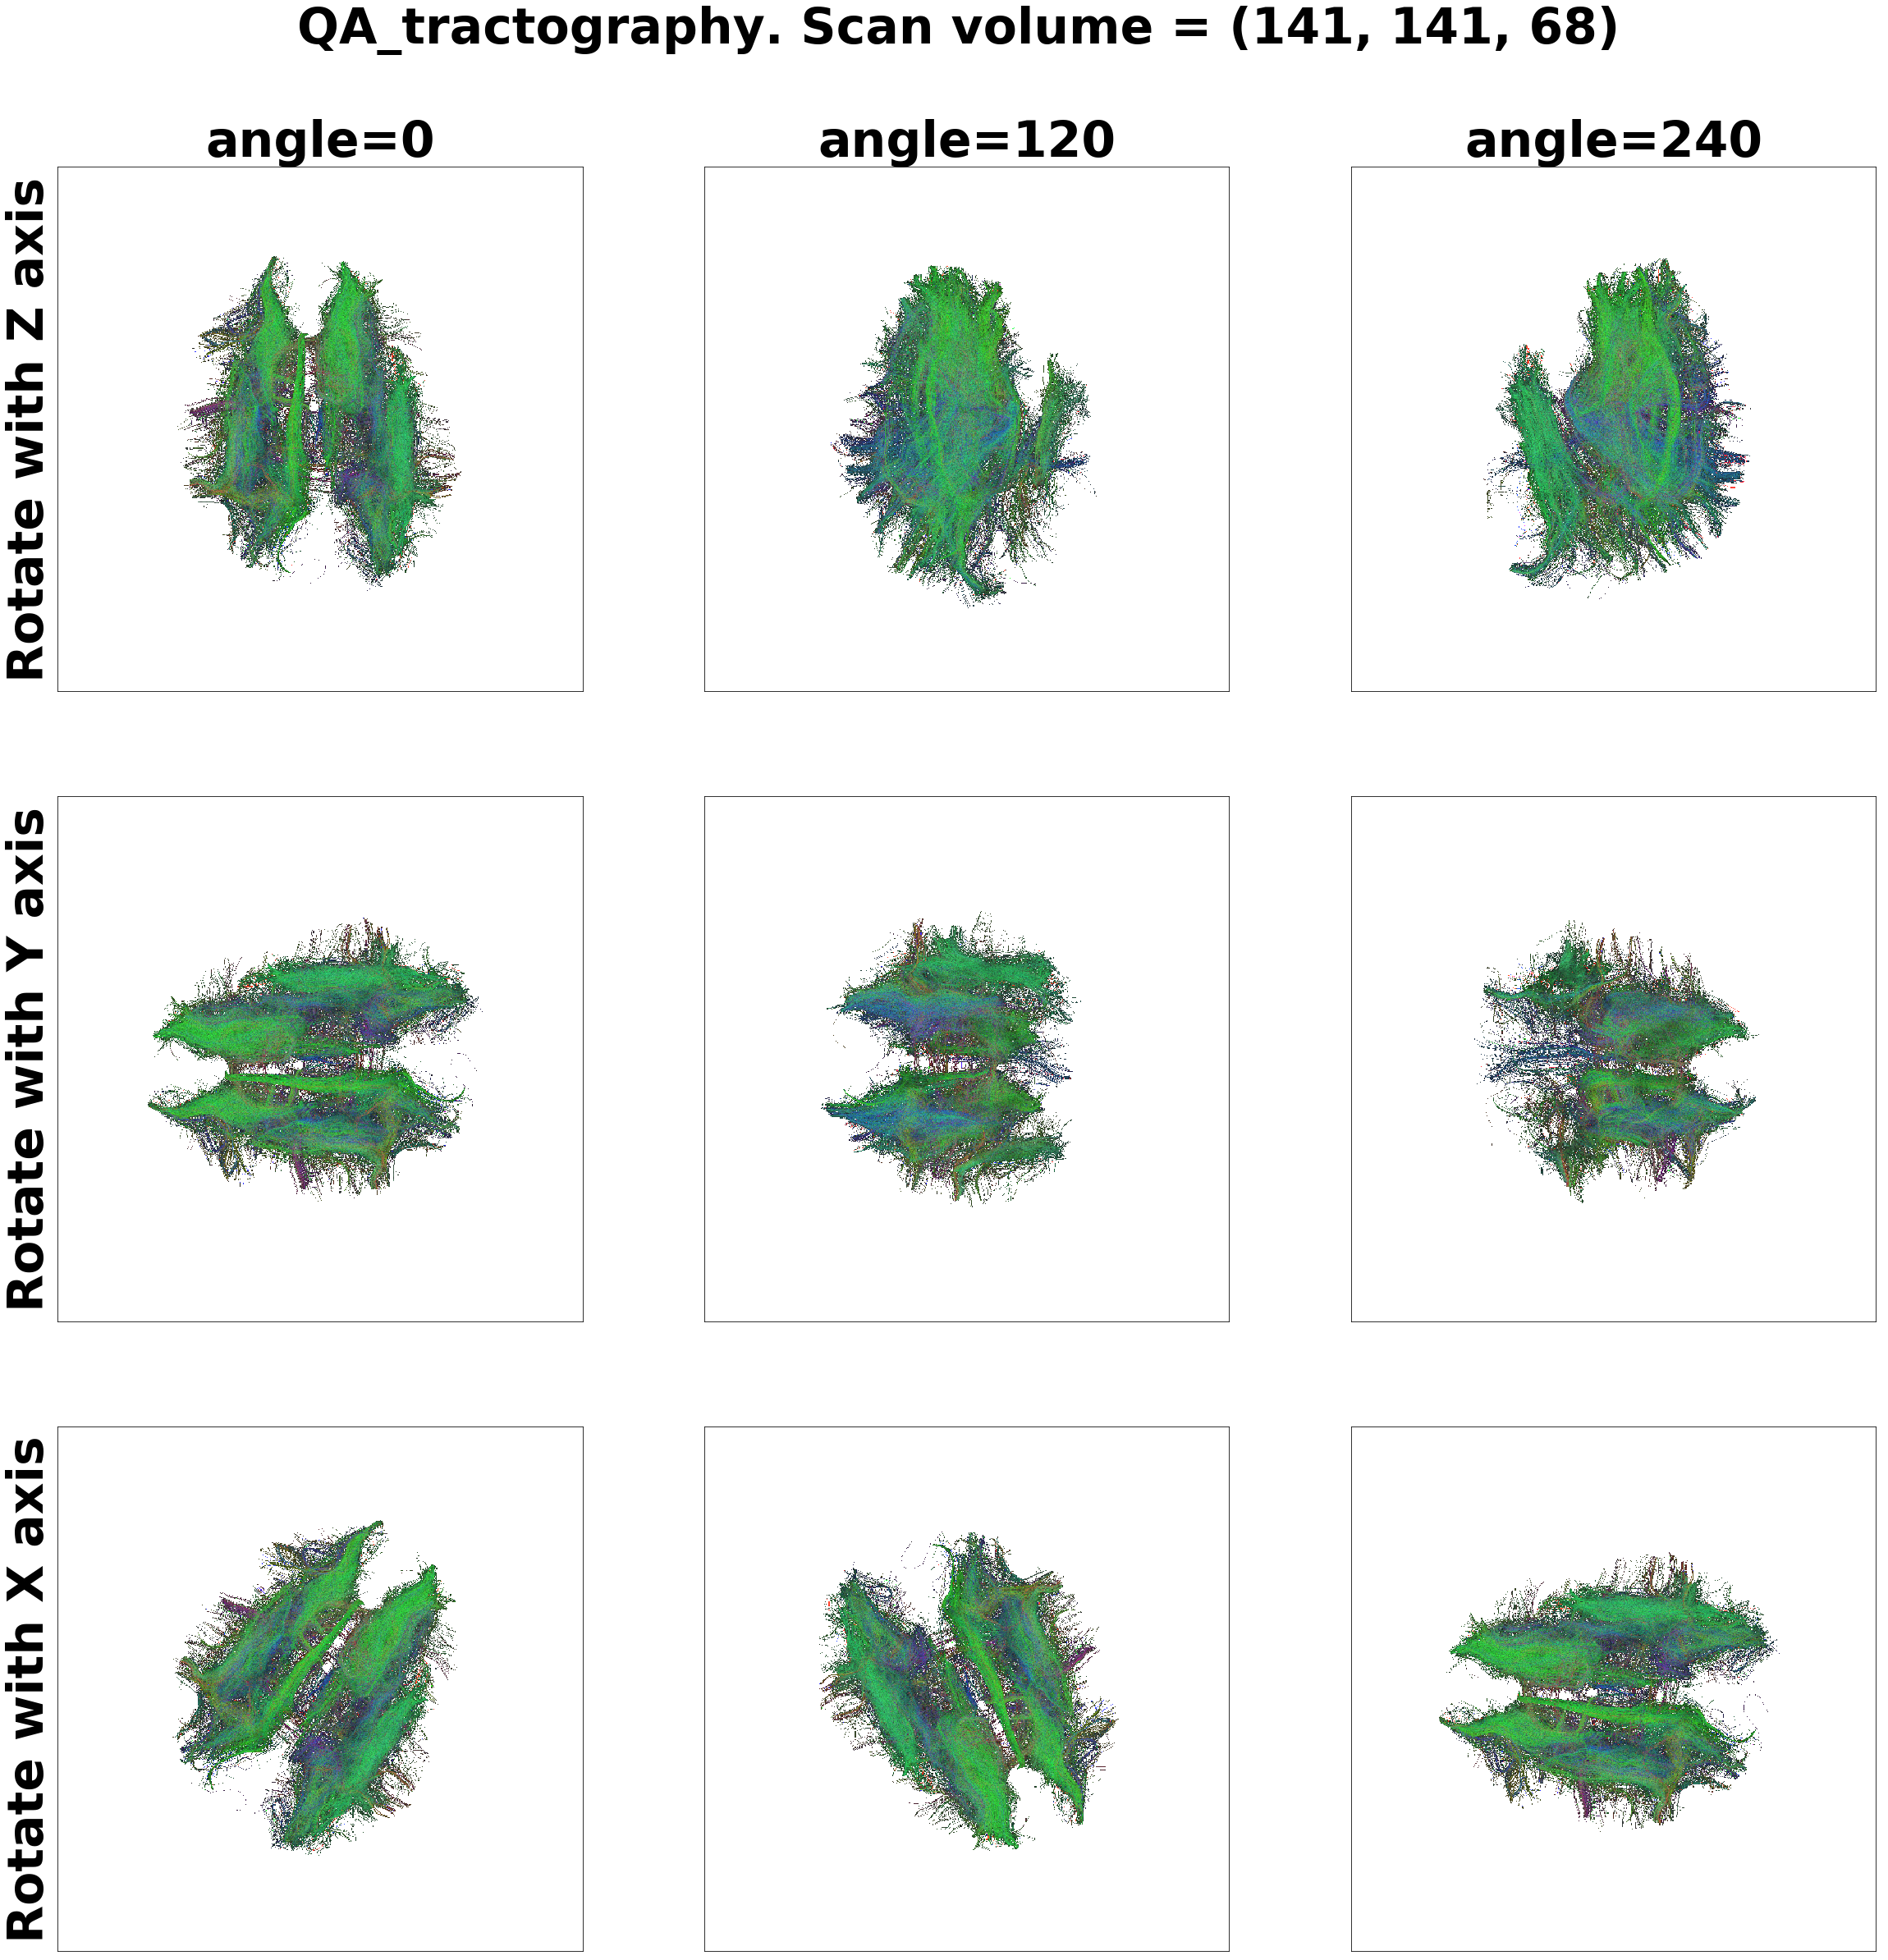

In [4]:
qa_tractography(stream_path,qa_out_path,brain_path)